In [58]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\clare\Documents\SHO-simulation\pendulum_simulation.csv", nrows=1000)

data

,TIME,ANGLE,ANGULAR_VELOCITY
0,0.00,0.785397,0.000000
1,0.01,0.785051,-0.069359
2,0.02,0.784010,-0.138670
3,0.03,0.782278,-0.207885
4,0.04,0.779853,-0.276955
...,...,...,...
995,9.95,0.096316,2.378155
996,9.96,0.120046,2.367563
997,9.97,0.143659,2.354665
998,9.98,0.167132,2.339481


In [59]:
import matplotlib.pyplot as plt

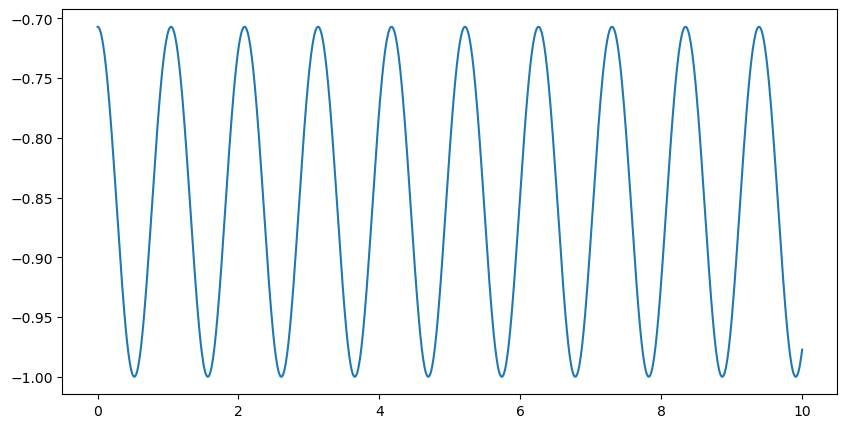

In [60]:
pendulum_sim = pd.read_csv("pendulum_simulation.csv")
plt.figure(figsize=(10, 5))
plt.plot(pendulum_sim["TIME"], -np.cos(pendulum_sim["ANGLE"]))

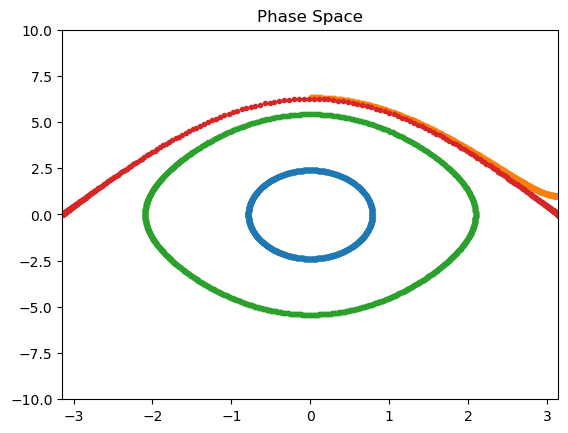

In [83]:
import math
plt.title("Phase Space")
pendulum_sim = pd.read_csv("pendulum_simulation.csv")
plt.plot(pendulum_sim["ANGLE"], pendulum_sim["ANGULAR_VELOCITY"], '.')
pendulum_sim = pd.read_csv("pendulum_simulation_pi.csv")
plt.plot(pendulum_sim["ANGLE"]%(6.28), pendulum_sim["ANGULAR_VELOCITY"], '.')
pendulum_sim = pd.read_csv("pendulum_simulation_pi6.csv")
plt.plot(pendulum_sim["ANGLE"], pendulum_sim["ANGULAR_VELOCITY"], '.')
pendulum_sim = pd.read_csv("pendulum_simulation_pi_m.csv")
plt.plot(pendulum_sim["ANGLE"], pendulum_sim["ANGULAR_VELOCITY"], '.')
plt.xticks()
plt.xlim(-math.pi, math.pi)
plt.ylim(-10, 10)
plt.savefig('Phase Space')